<a href="https://colab.research.google.com/github/Gowthami264/Predictive-Analytics/blob/credit_card_hypertuning/creditcard_hypertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class distribution:
Class
0.0    17836
1.0       81
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5352
         1.0       0.78      0.75      0.77        24

    accuracy                           1.00      5376
   macro avg       0.89      0.87      0.88      5376
weighted avg       1.00      1.00      1.00      5376

Confusion Matrix:
[[5347    5]
 [   6   18]]


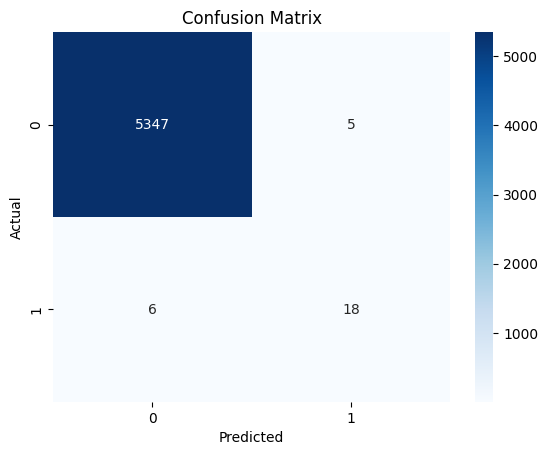

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('creditcard.csv')

# Drop rows with NaN in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

# Check class balance
print("Class distribution:")
print(df['Class'].value_counts())

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
